# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

In [26]:
# Import packages and libraries
#==> ENTER YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 


**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
#==> ENTER YOUR CODE HERE
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [7]:
#==> ENTER YOUR CODE HERE
df.size

408582

Use describe... 

In [8]:
#==> ENTER YOUR CODE HERE
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [9]:
#==> ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [12]:
# Convert data columns to datetime
#==> ENTER YOUR CODE HERE

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

**trip distance**

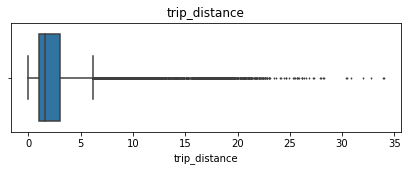

In [31]:
# Create box plot of trip_distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(x=df['trip_distance'], fliersize=1)


Text(0.5, 1.0, 'Trip distance histogram')

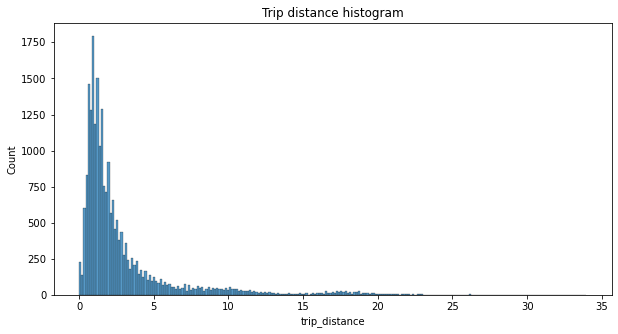

In [32]:
# Create histogram of trip_distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='trip_distance')
plt.title('Trip distance histogram')

**total amount**

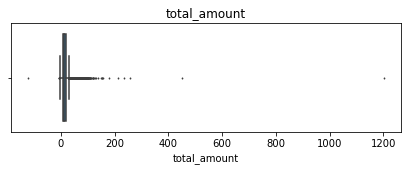

In [33]:
# Create box plot of total_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

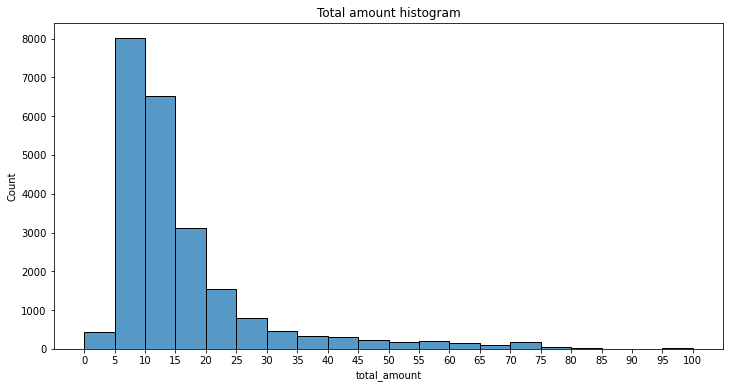

In [40]:
# Create histogram of total_amount
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,6))
plt.title('Total amount histogram')

ax = sns.histplot(data=df, x='total_amount', bins=range(0,101,5))
ax.set_xticks(range(0,101,5))
ax.set_xticklabels(range(0,101,5))
plt.show()

**tip amount**

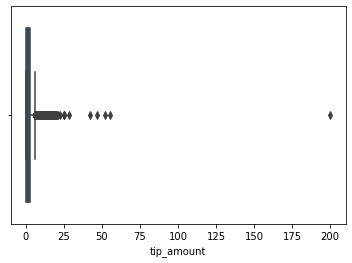

In [21]:
# Create box plot of tip_amount
#==> ENTER YOUR CODE HERE
sns.boxplot(x=df['tip_amount'])

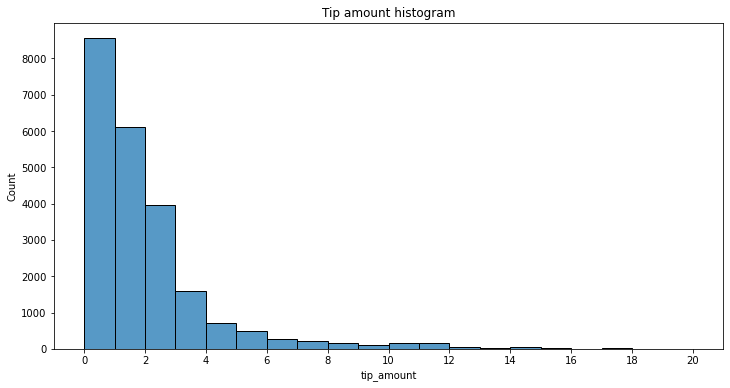

In [55]:
# Create histogram of tip_amount
#==> ENTER YOUR CODE HERE

plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');


**tip_amount by vendor**

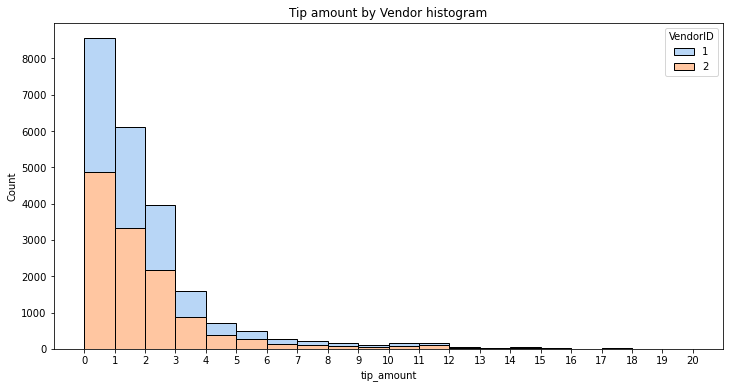

In [62]:
# Create histogram of tip_amount by vendor
#==> ENTER YOUR CODE HERE


plt.figure(figsize=(12,6))
plt.title('Tip amount by Vendor histogram')

ax = sns.histplot(data=df, x='tip_amount', hue='VendorID',
                  bins=range(0,21,1), 
                  multiple='stack', 
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.show()

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

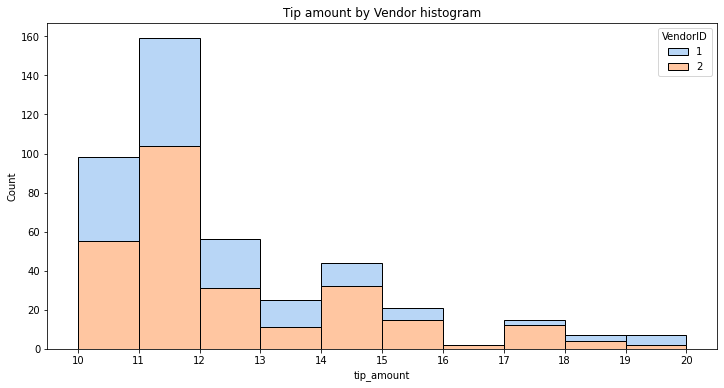

In [67]:
# Create histogram of tip_amount by vendor for tips > $10 
#==> ENTER YOUR CODE HERE
df1 = df[df['tip_amount'] > 10]

plt.figure(figsize=(12,6))
plt.title('Tip amount by Vendor histogram')

ax = sns.histplot(data=df1, x='tip_amount', hue='VendorID',
                  bins=range(10,21,1), 
                  multiple='stack', 
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.show()

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [69]:
#==> ENTER YOUR CODE HERE
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [70]:
# Calculate mean tips by passenger_count
#==> ENTER YOUR CODE HERE
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean()[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


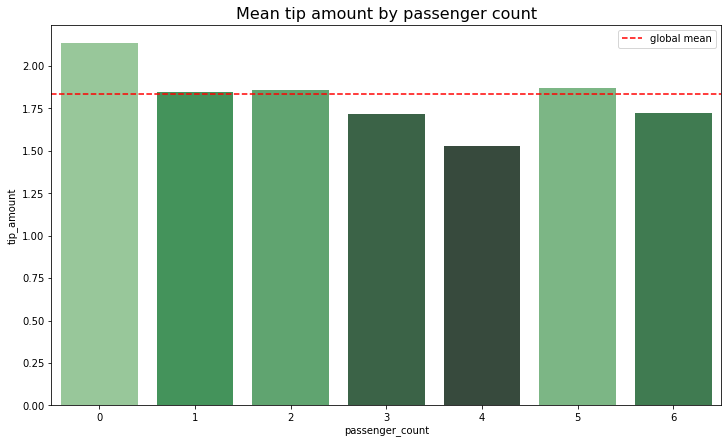

In [76]:
# Create bar plot for mean tips by passenger count
#==> ENTER YOUR CODE HERE
data= mean_tips_by_passenger_count
pal= sns.color_palette('Greens_d', len(data))
rank= data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax= sns.barplot(x=data.index,
               y=data['tip_amount'],
               palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);
                                    

**Create month and day columns**

In [77]:
# Create a month column
#==> ENTER YOUR CODE HERE
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
#==> ENTER YOUR CODE HERE
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [79]:
# Get total number of rides for each month
#==> ENTER YOUR CODE HERE
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

Reorder the results to put the months in calendar order.

In [80]:
# Reorder the monthly ride list so months go in order
#==> ENTER YOUR CODE HERE
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides= monthly_rides.reindex(index=month_order)

In [82]:
# Show the index
#==> ENTER YOUR CODE HERE
monthly_rides.index


Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

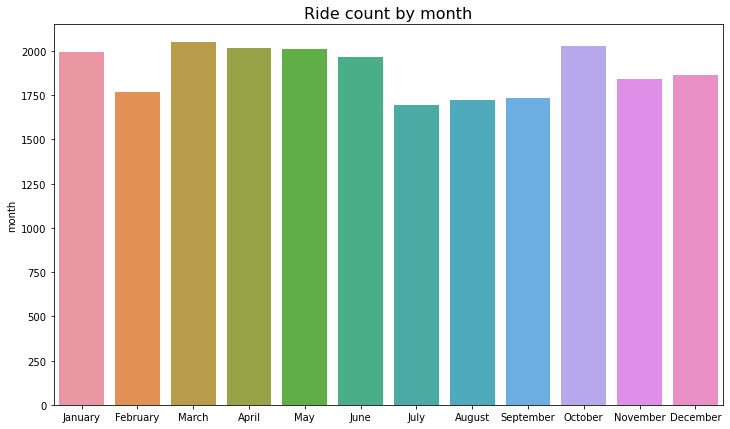

In [88]:
# Create a bar plot of total rides per month
#==> ENTER YOUR CODE HERE
plt.figure(figsize = (12, 7))
sns.barplot(x=monthly_rides.index,
            y=monthly_rides,)
plt.title('Ride count by month', fontsize=16);

###or

plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [91]:
# Repeat the above process, this time for rides by day
#==> ENTER YOUR CODE HERE
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides= daily_rides.reindex(index=day_order)

daily_rides.index


Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

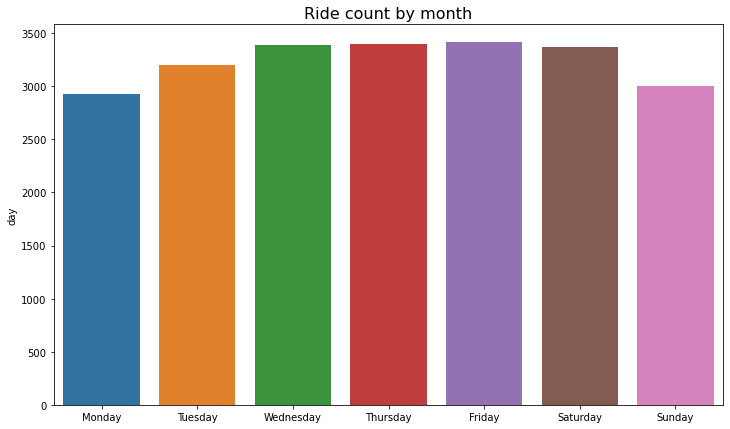

In [92]:
# Create bar plot for ride count by day
#==> ENTER YOUR CODE HERE
plt.figure(figsize = (12, 7))
sns.barplot(x=daily_rides.index,
            y=daily_rides,)
plt.title('Ride count by month', fontsize=16);

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [93]:
# Repeat the process, this time for total revenue by day
#==> ENTER YOUR CODE HERE
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day').sum()[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


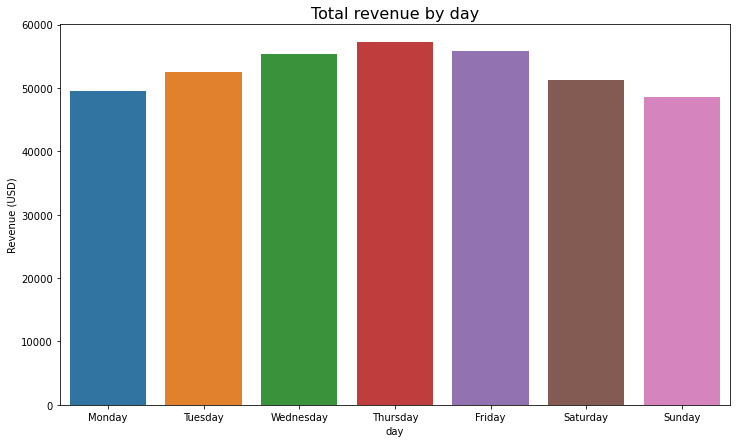

In [94]:
# Create bar plot of total revenue by day
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

**Plot total revenue by month**

In [95]:
# Repeat the process, this time for total revenue by month
#==> ENTER YOUR CODE HERE
total_amount_month = df.groupby('month').sum()[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


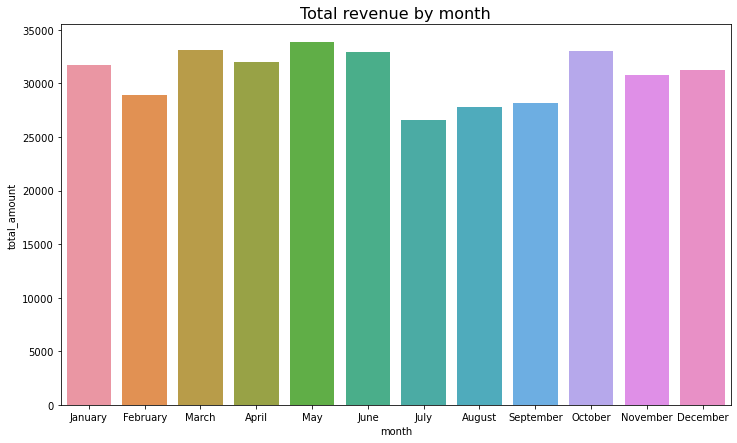

In [96]:
# Create a bar plot of total revenue by month
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16);

**Plot mean trip distance by drop-off location**

In [97]:
# Get number of unique drop-off location IDs
#==> ENTER YOUR CODE HERE
df['DOLocationID'].nunique()

216

In [98]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean()[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff 

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


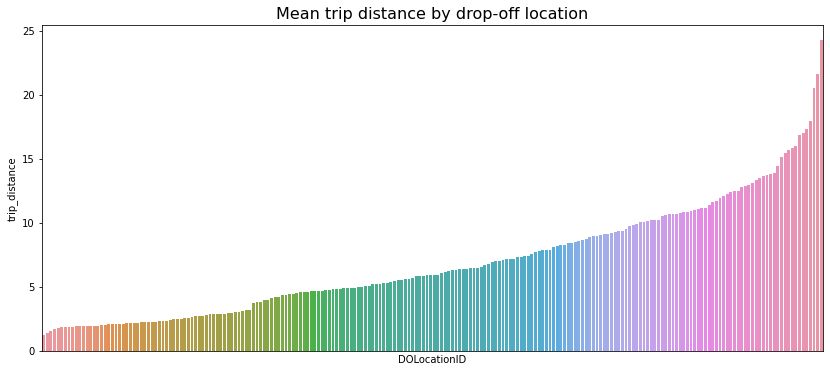

In [99]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

## BONUS CONTENT

To confirm your conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

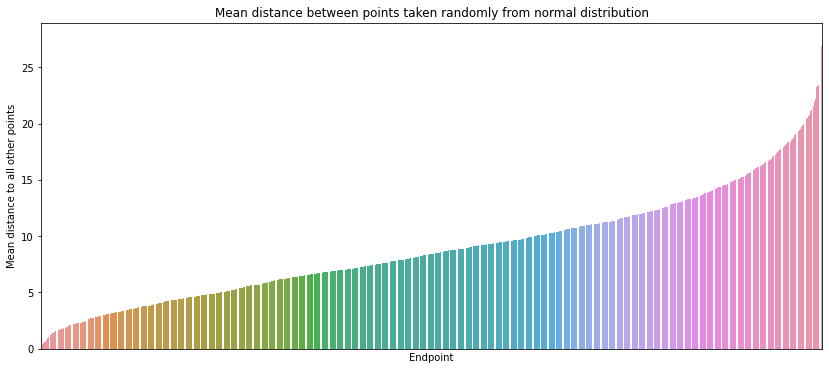

In [101]:
#BONUS CONTENT

#1. Generate random points on a 2D plane from a normal distribution
#==> ENTER YOUR CODE HERE
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
#==> ENTER YOUR CODE HERE
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
#==> ENTER YOUR CODE HERE
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [102]:
# Check if all drop-off locations are consecutively numbered
#==> ENTER YOUR CODE HERE
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

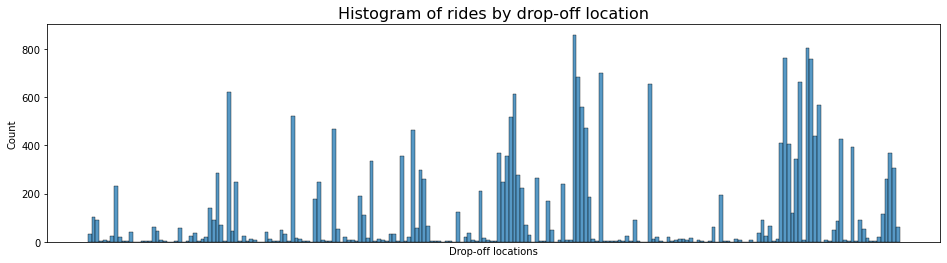

In [103]:
#==> ENTER YOUR CODE HERE
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
#==> ENTER YOUR CODE HERE
sorted_dropoffs = df['DOLocationID'].sort_values()

# Convert to string
#==> ENTER YOUR CODE HERE
sorted_dropoffs = sorted_dropoffs.astype('str')

# Plot
#==> ENTER YOUR CODE HERE
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

In [104]:
#==> ENTER YOUR CODE HERE
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [105]:
#==> ENTER YOUR CODE HERE
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26
